In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('UsArrests.csv')
df.head()


,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600


In [105]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# Use the describe function to get a sense of the data
stats = df.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() 
selected_stats


,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


array([[<Axes: title={'center': 'Murder'}>,
        <Axes: title={'center': 'Assault'}>],
       [<Axes: title={'center': 'UrbanPop'}>,
        <Axes: title={'center': 'Rape'}>]], dtype=object)

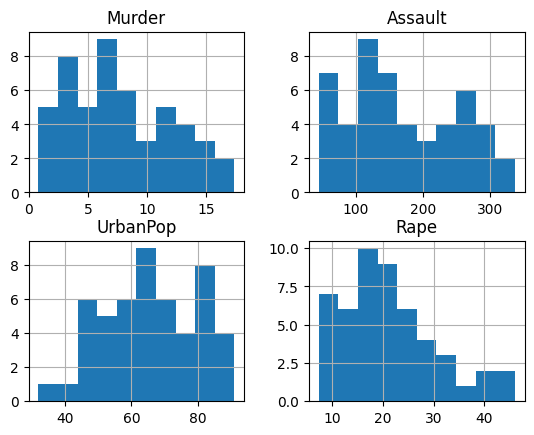

In [106]:
# Plot histograms to get a sense of the spread of the data for each variable. 
df.hist()

In [107]:
print(df.dtypes)

City         object
Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object


In [108]:
# Preprocessing the data
# First check for null values 
df.isnull().sum()
# Because there are no NAN values there is no need remove or replace any values.

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [109]:
# Transform states into an index
cities = df.index

# Create a database that only contains numerics for plots later on 
df_numeric = df.drop(['City'], axis = 1)
labels = df_numeric.columns

# Create database with cities dropped
cities_df = df['City']

I transformed the dataframe into an indexed dataframe becasue i needed each row uniquely identified and it allows me to have labeel based access data which will help me, amongst other things, plot my biplots. 

i needed to create another dataframe where only the numeric data existed because that is the data that would feet well into a correlation matrix. 

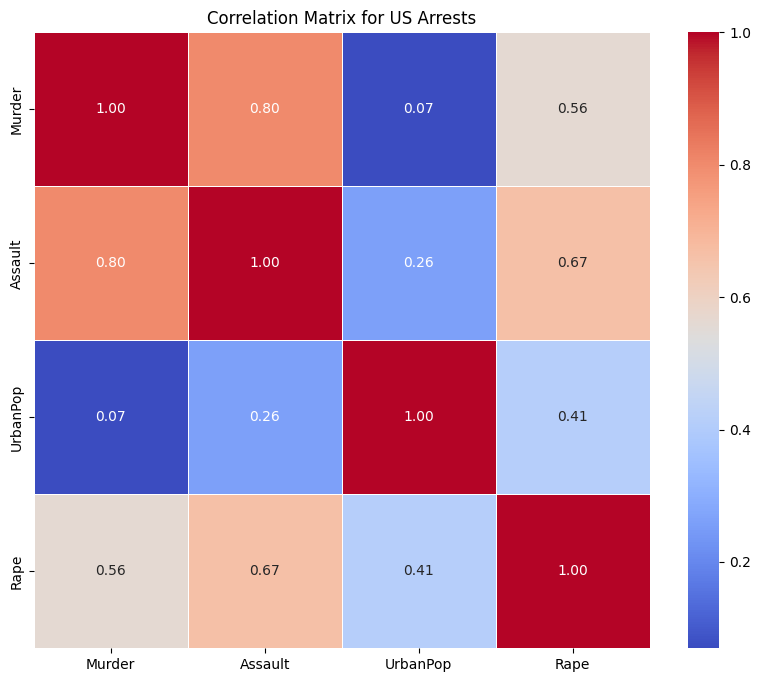

In [110]:
correlation_matrix = df.drop(['City'], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plotting the correlation matrix using seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, fmt='.2f', linewidths=.5)

# Adding title to the heatmap
plt.title('Correlation Matrix for US Arrests')

# Show the plot
plt.show()


From the correlation plot it is evident that assault and murder have a strong positive correlation no doubt becasue most instances of murder also entail the commiting of an assualt. For example, a fist fight that goes too far resulting in the death of one of the fighters entails both assulat and murder. Variations of this dynamic are likely hence the strong correlation between the two. Rape and assault have a similar dynamic relationship as many rapes entail assault as part of the specific incident. Murder and rape have a positive correlation but it is not very strong. This is because the acts are not bound together in the same dynamic way that the other crimes are. Sometimes people rape someone then murder them. Sometimes they just murder them. Sometiems they just rape them. The presence of a positive correlation does indicate that if you have been rapped there is a statistically significant chance that you will also be murdered which is a pretty awful to think about.

Another interesting observation is that there are no strong correlations between urban population and the number of crimes which suggests that crime does no increase per level of urban population. Rape has some correlation, at 41 percent, but murder is practically zero. This points to other factors outside of this dataser which contribute strongly towards crime rates. Proximity to drugs and gang activity for example. Furthermore, many states do not have high urban populations but have high rural populations. If rural populations were added as a feature, we might see higher correlations for certaih crimes. Better yet, if popualtion statistics were not seperated according to urban, rural etc, we might get a better sense of the relationship between crime and popualtion. 

In [111]:
np.set_printoptions(precision=2)

X = df_numeric

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.80,-11.45,-2.49,2.41
1,92.83,-17.98,20.13,-4.09
2,124.07,8.83,-1.69,-4.35
3,18.34,-16.70,0.21,-0.52
4,107.42,22.52,6.75,-2.81


In [112]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [113]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [114]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [115]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = cities_df[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

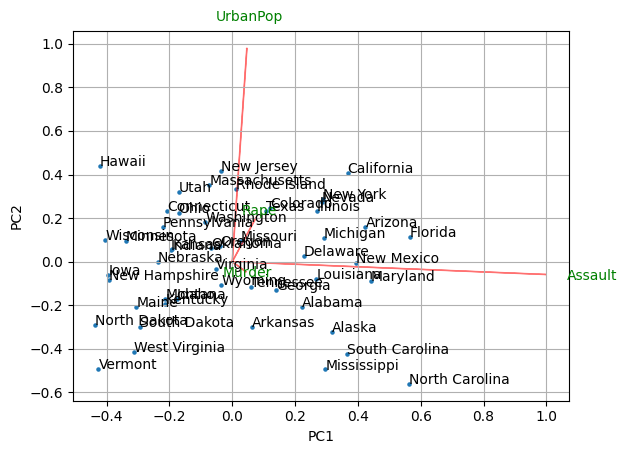

In [116]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(cities))
plt.show()

Considering the above biplot the first principal component is dominated by Assault because there are simply more assaults than any other crime. This makes it difficult to see how other states vary with respect to the variables murder and rape.The crime of murder is also hard to also difficult to see probably because there are fewer murders relative to the other principal components. The fact that there is a little variance between rape and urban population indicates that these two variables aren't influencing the same principal components. Urban population is tied strong the the second principal component whilst assault is tied storngly to the first principal component. Murder is going in a line that is slightly down and to the right which inidates that there is a partial but negative influence from the first component. Rape is receiving the most influence from the first componenet of all the crimes but it is still tied to the first principal component. After being standardized, these influences should be more pronounced and be easier to interpret. 

In [117]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


In [118]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,-1.133,-0.444,-0.156
1,1.950,-1.073,2.040,0.439
2,1.763,0.746,0.055,0.835
3,-0.141,-1.120,0.115,0.183
4,2.524,1.543,0.599,0.342


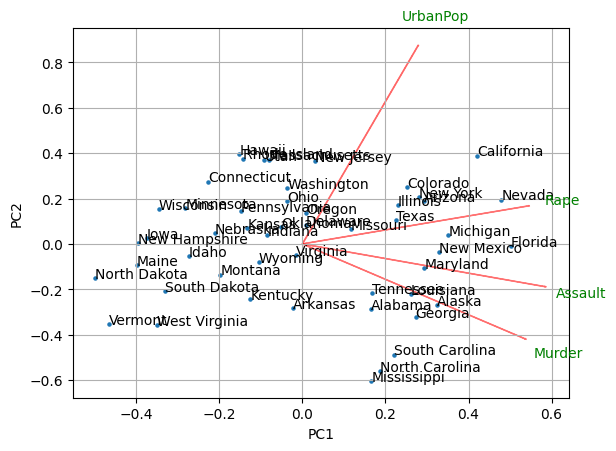

In [119]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

As expected, after standardisation of the data it is easier to see patterns betwwen states and the principal components.Carrying on with the trend from the earlier biplot, rape, assault and murder have stronger associations with the first principal component whilst urban population remains mostly has stronger associations by the second principla component. A surprising change is that urban population has a more defined association with the first principal component than it was before standardisation. This is due to the equal scaling of all variables. Standardisation adjusted all variables dmeans to 0 and a standarsiation of 1 which makes the comparison of all variables more equitable. 

Assaulr murder and rape are projected in the same direction which means they are positively correlated with PC1.

In [120]:
# Feature importance

pc1 = abs( std_pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( std_pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PC1 Importance"] = pc1
feat_df["PC2 Importance"] = pc2
feat_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.536,0.418
1,Assault,0.583,0.188
2,UrbanPop,0.278,0.873
3,Rape,0.543,0.167


Text(0.5, 1.0, 'Cumulative Explained Variance')

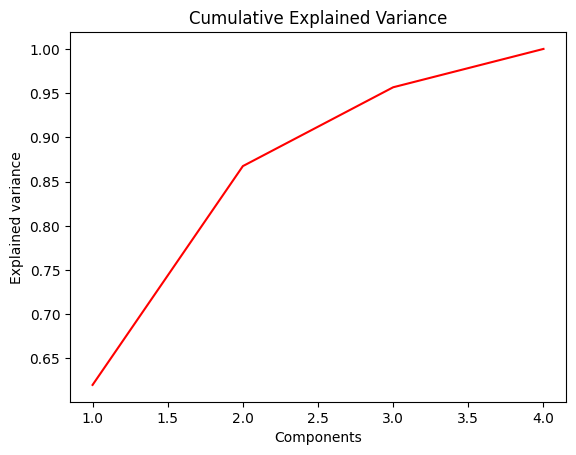

In [121]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

The first 3 componennts explain 95 percent of the variance. Therefor 3 components should be used when performing cluster analysis. So we have maneged to reduce the number of components by 1.

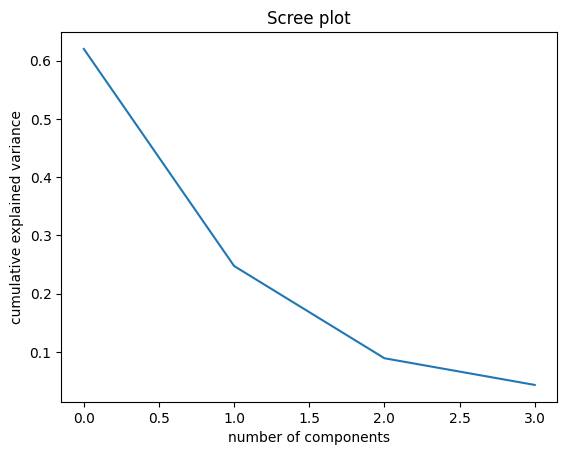

In [122]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

In [123]:
pca_df = pd.DataFrame(X_std_trans[:,0:5], index = df.index)
pca_df.head()

,0,1,2,3
0,0.986,-1.133,-0.444,-0.156
1,1.950,-1.073,2.040,0.439
2,1.763,0.746,0.055,0.835
3,-0.141,-1.120,0.115,0.183
4,2.524,1.543,0.599,0.342


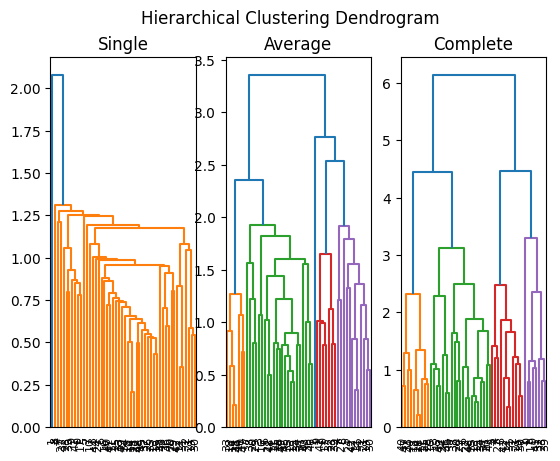

In [124]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Hierarchical Clustering Dendrogram')
ax1.set_title("Single")
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) 
ax2.set_title("Average")
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)
plt.show()

From the above dendograms, the complete linkage method provides an adequate disperson of clusters and will therefore be used for the rest of analysis. See this below

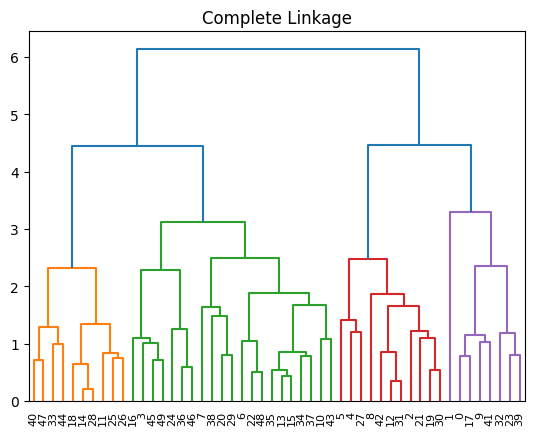

In [125]:
plt.title("Complete Linkage")
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

The first interesting thing that can be noted from this dendogram is that on the whole there is a fair bit of dissimalirity  after the first and second cluster merges as can be seen from the fact that the euclidean distance (the vertical lines) is relatively large as each cluster runs from the botton 'leaves' till the top. This disimilairty indicates that there is not a great deal of repition in the data but the fact there is pronounced clustering also means that even within that dissimality there are distinct groupings of the datapoints. 

Another insight is that states that merge closer to the bottom of the dendogram are more similar in terms of the Murder, Assault, UrbanPop, Rape. Another way of saying this is simply that all the sates with crime profiles that are similar also form small, close structures.

At the higher levels of euclidean distance, say you cut the line at 3.5 on the y-axis, you would get distinct clusters which represent states crime patterns that are distincly different in terms of their pattern including urbanisation levles. 

Outliers may be represented by clusters that merge at very high distances. Alaska, which is at position 1 on the dendogram, only merges for the first time at about 3.5 on the y-axis. This relativly massive space is also an inidaction that it is greatly dissimar to all the other datapoints. The reason for this is that it has a relatively low population but its crime rate is still abnoramlly high. 

I believe the distinct clusters represented are cluster with hihg crime rates in the urban population, low crime rates in populations that are mostly not urban and moderate crime rate with a bigh urban population. 

In [126]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)   # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns

# Display the DataFrame
display(df)

# Reset options to default after displaying if needed
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.200,236,58,21.200
1,Alaska,10.000,263,48,44.500
2,Arizona,8.100,294,80,31.000
3,Arkansas,8.800,190,50,19.500
4,California,9.000,276,91,40.600
5,Colorado,7.900,204,78,38.700
6,Connecticut,3.300,110,77,11.100
7,Delaware,5.900,238,72,15.800
8,Florida,15.400,335,80,31.900
9,Georgia,17.400,211,60,25.800


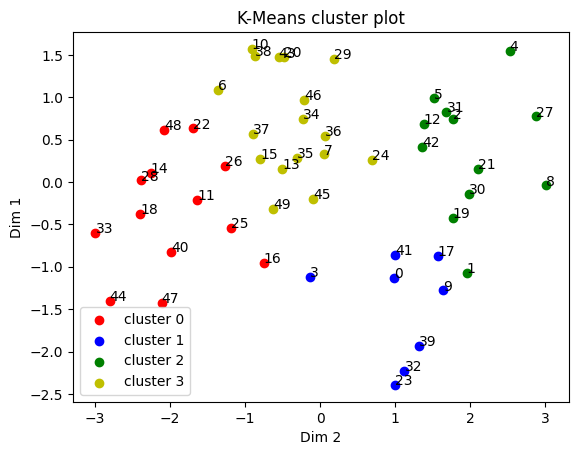

In [127]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i], label = f'cluster {i}') 

for i in range(0,len(x)):
        txt = cities[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")
ax.legend()

The datapoints placement here resembles the placement in the standardised biplot which we looked at earlier. This implies that the dimensions themselves are assoication with principal components 1 and 2 (PC1 and PC2). Whilst this means that all the data points are made in a patterns that takes into account both the crime rate and the urban population the strong association between PC 2 and urban population and PC1 and the crime rates we are able to generalise and describe aspects of each cluster which I will do below.

Cluster 0 (red) is made up mostly of states that have low to moderately large population sizes but have low amounts of crime. 
Cluster 1 (blue) is made up mostly of states with low to moderate population levels but have relatively high levels of crime.
Cluster 2 (greeen) is made up mostly of states that have moderate to high population levels and high levels of crime. 
Cluster 3 (yellow) is made up mostly of states that have moderate to high population levels and have moderate levels of crime

Lets illustrate the difference in these clusters by looking at two vastly different data points. California and Vermont (4 and 44) lie at the most extreme edges of all the clusters. If you look at the table above the k means plot you will see that Califorina probably has the hgiehst population whislt Vermont has probably got the lowest popualtion. California also has high crime rates particularily regarding rape and and assauly whilst Vermont has some of the lowest crime rates. This is just a sample to show that the conclusions drawn about the k means plot are born out by the base dataset. 

In [128]:
# Groups - translate to readable names
clusters = pd.DataFrame()

group0_indices = np.argwhere(cluster_labels==0).transpose()[0]
group1_indices = np.argwhere(cluster_labels==1).transpose()[0]
group2_indices = np.argwhere(cluster_labels==2).transpose()[0]
group3_indices = np.argwhere(cluster_labels==3).transpose()[0]

group0 = np.array(cities)[group0_indices]
group1 = np.array(cities)[group1_indices]
group2 = np.array(cities)[group2_indices]
group3 = np.array(cities)[group3_indices]


print("Group 0: {}\n\n".format([df.loc[x]["City"] for x in group0]))
print("Group 1: {}\n\n".format([df.loc[x]["City"] for x in group1]))
print("Group 2: {}\n\n".format([df.loc[x]["City"] for x in group2]))
print("Group 3: {}\n\n".format([df.loc[x]["City"] for x in group3]))

Group 0: ['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']


Group 1: ['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']


Group 2: ['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas']


Group 3: ['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'Missouri', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']




In conclusion, there exist large differences in crime rates per state and these seem unexpectedly detached from popualtion density. There is good news in this because it means that dense popualtions are not doomed to suffer from higher crime rates. Those places with high population densities but relaltively lower crime rates can teach worse off citites whatever methods they use to improve clamping down on crime. Of course there are other factors which may be skewing the data, such as proximity to drug cartels, and these should be looked into in order to get a better sense of what makes certain cities so much more dangerous than others. 